<a href="https://colab.research.google.com/github/rambakale/Capstone-Project-Bike-sharing-demand-analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing the libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab

# **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# **Data info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Checking Null Values**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Shape of dataset
df.shape

(8760, 14)

In [ ]:
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

# **EXPLORATORY DATA ANALYSIS**

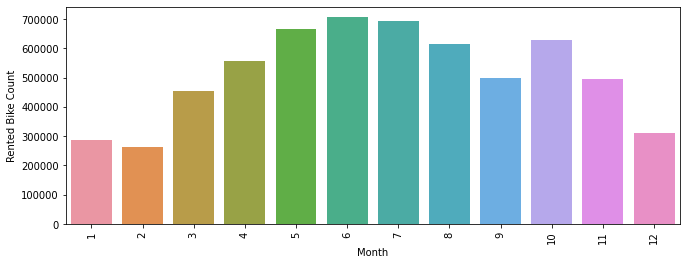

In [ ]:
#Analysing in which month the Rented Bike Count was the highest
Month = df.groupby("Month").sum().reset_index()
plt.figure(figsize=(11,4))
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

# Month 6 i.e  in the month of June the Rented Bike Count was the highest

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

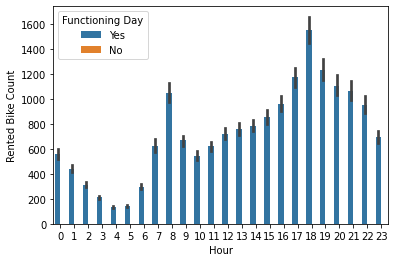

In [ ]:
 #Analysing count of Rented Bike on the basis of hour in both functioning and non functioning days
 sns.barplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['Functioning Day'],data=df);

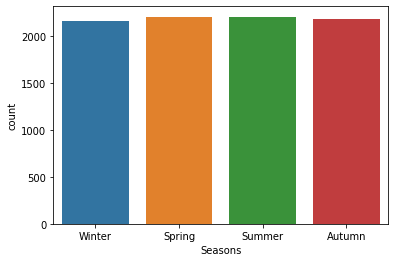

In [ ]:
#Analysing Count of Rented Bikes for different seasons.
sns.countplot(x="Seasons",data=df)

# Let's see the distribution of our Dependent Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


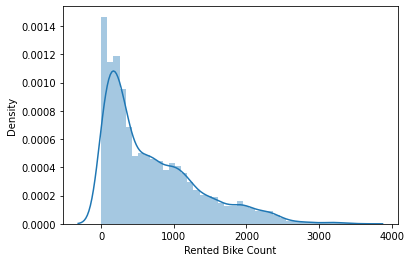

In [ ]:
sns.distplot(df['Rented Bike Count'])

# We can see it is right skewed, Let's take a square root of dependent variable and draw the plot it will give us more clarification about data and we can visualize in a better way...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


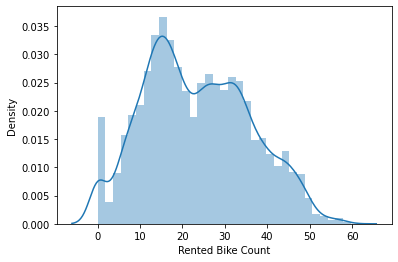

In [ ]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [ ]:
#Storing all the int and float values in a variable
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


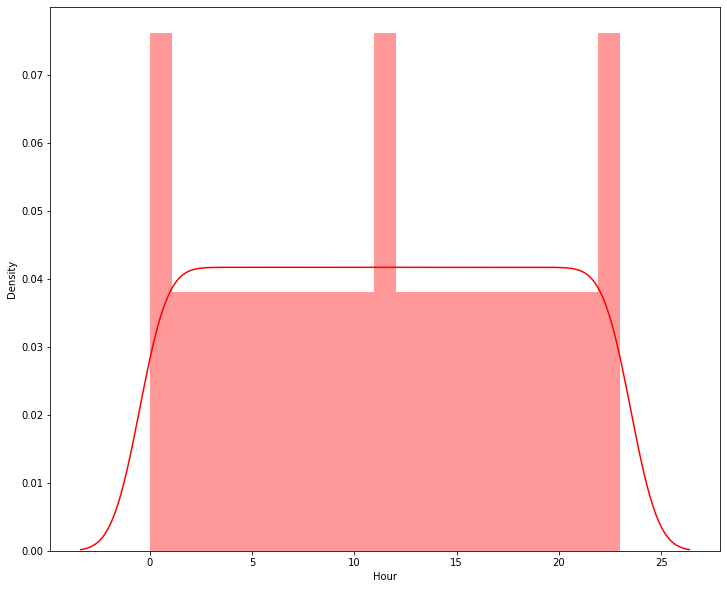

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


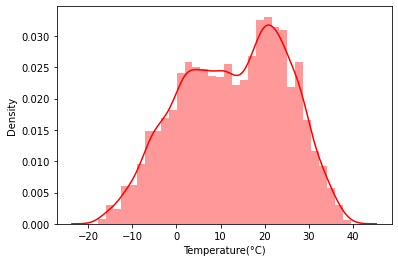

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


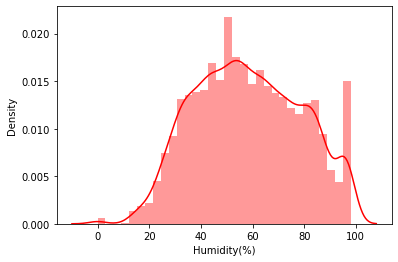

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


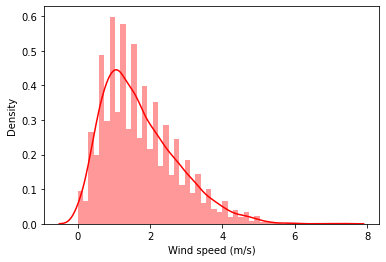

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


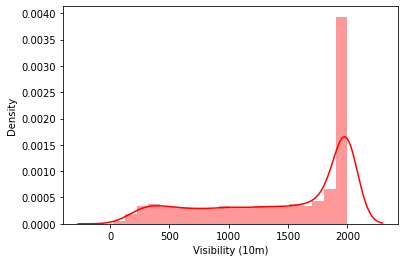

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


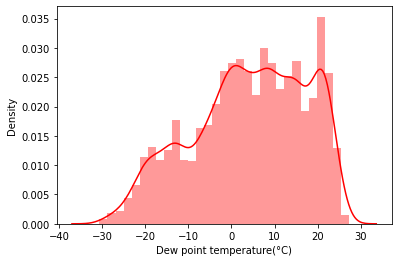

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


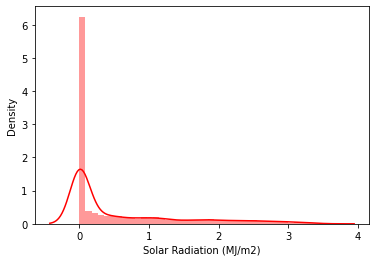

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


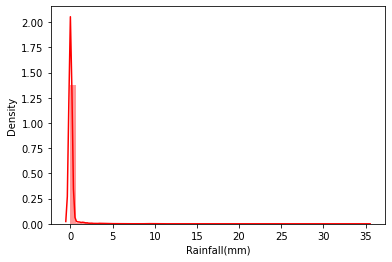

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


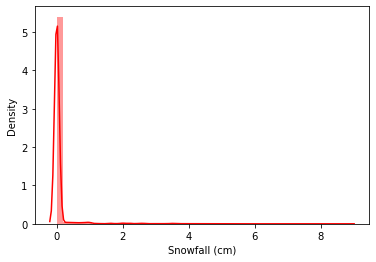

In [ ]:
#Checking the distribution of all the Independent variables
plt.figure(figsize=(12,10))
for col in numeric_features[1:10]:
  sns.distplot(df[col],color='R')
  plt.show()

In [ ]:
#Skewness of the variables in ascending order
df.skew().sort_values(ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

# **Skewed Data**
## 1.**Right Skewed Data:**
Wind speed (m/s)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)
# 2.**Left Skewed Data:**
Visibility (10m)

Dew point temperature(°C)





In [ ]:
#Storing all the right skewed and left skewed data in separate variables
right_ske_numeric=['Wind speed (m/s)','Solar Radiation (MJ/m2)']
highly_right_skewed = ['Rainfall(mm)','Snowfall (cm)']
left_skew_feat=['Dew point temperature(°C)','Visibility (10m)']

**Temperature and Humidity they are already in Normal Form**

# **Transformation**

In [ ]:
#Creating function to plot distplot and probplot of the features
def plot_data(df,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature],color="g")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


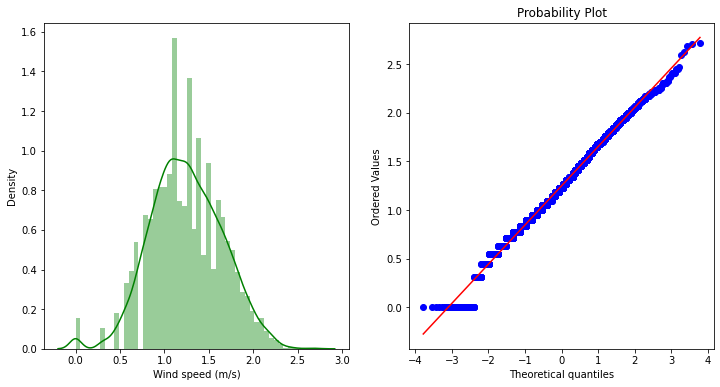

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 504x504 with 0 Axes>

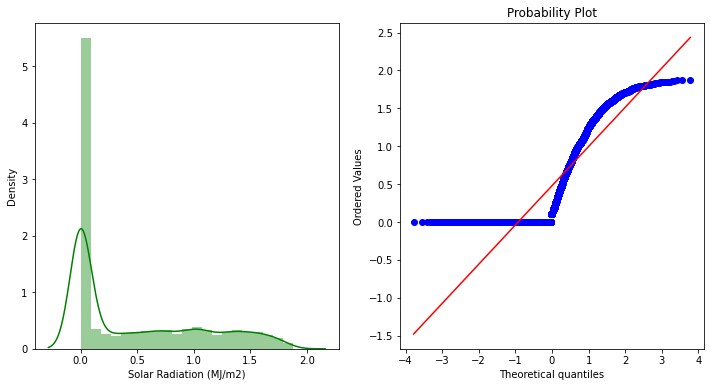

<Figure size 504x504 with 0 Axes>

In [ ]:
#For right skewed data
df_clean=df.copy()
for col in right_ske_numeric:
  df_clean[col]=np.sqrt(df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


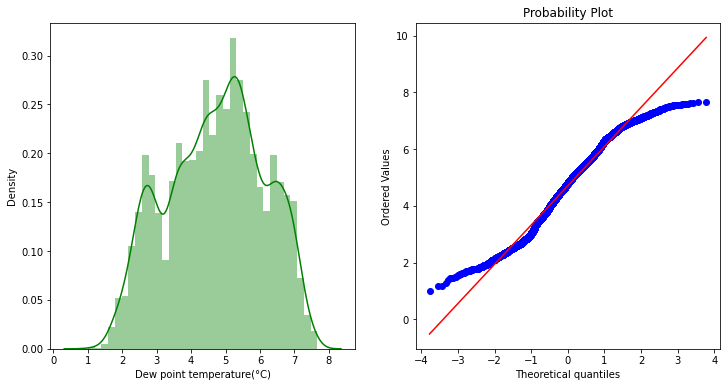

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 504x504 with 0 Axes>

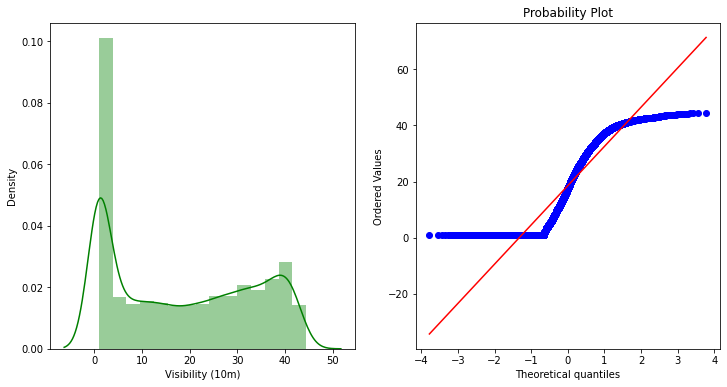

<Figure size 504x504 with 0 Axes>

In [ ]:
#For left skewed data
for col in left_skew_feat:
  df_clean[col]=np.sqrt(max(df_clean[col]+1)-df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


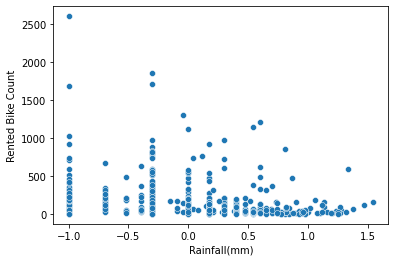

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


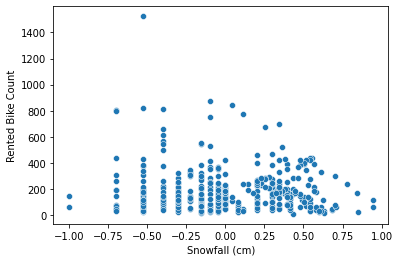

In [ ]:
for col in highly_right_skewed:
    feature_highly_right = np.log10(df[col])
    sns.scatterplot(x=feature_highly_right,y=df['Rented Bike Count'],data=df)
    plt.show()

# Let's try to plot some scatter plot between independent and  dependent variable to find the relation between them

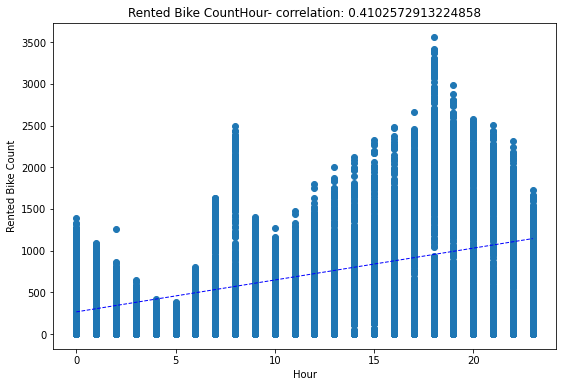

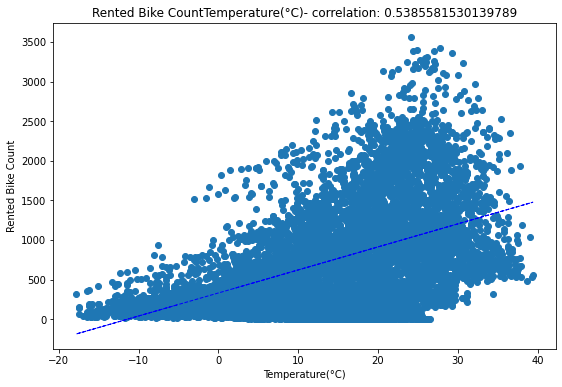

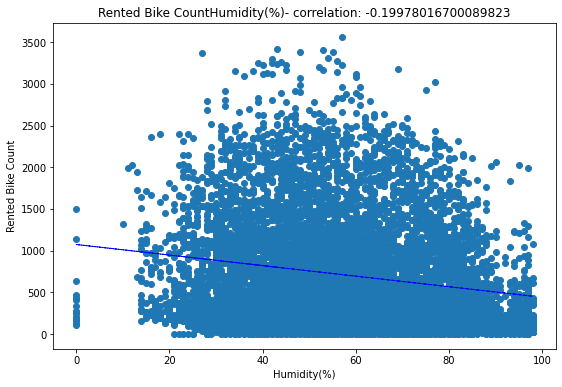

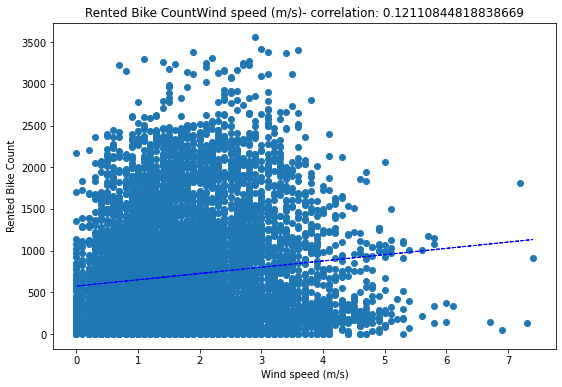

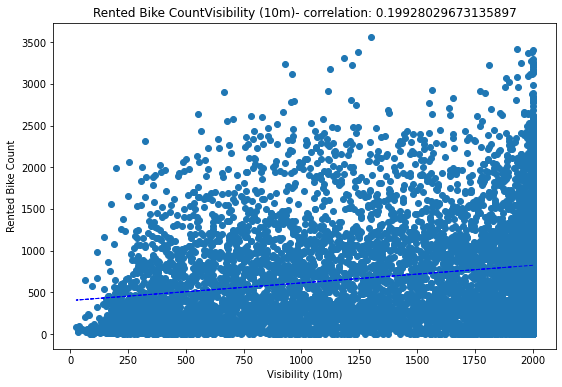

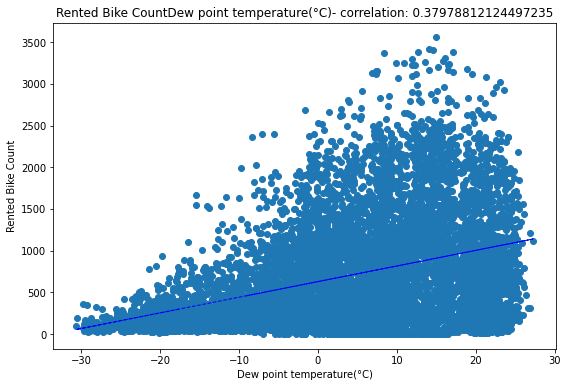

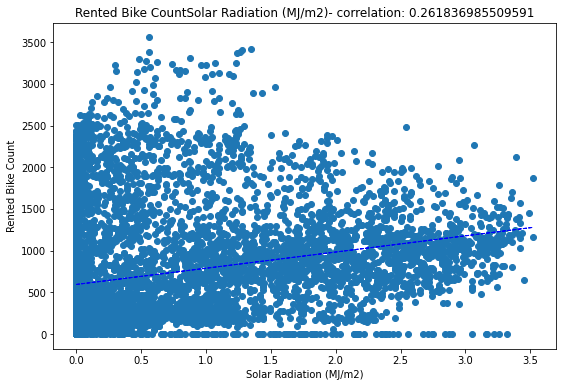

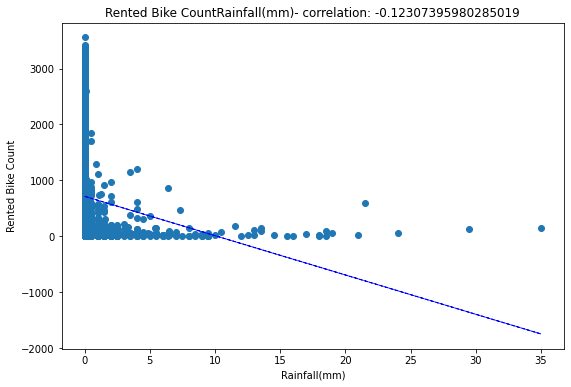

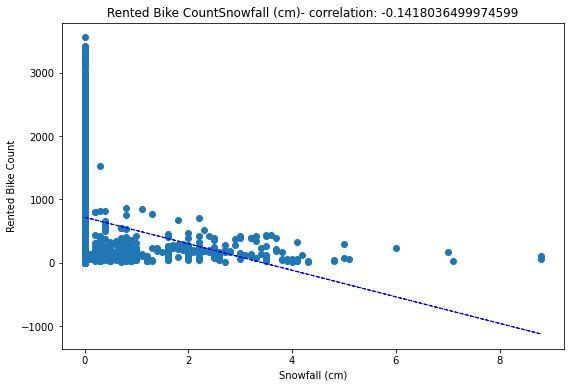

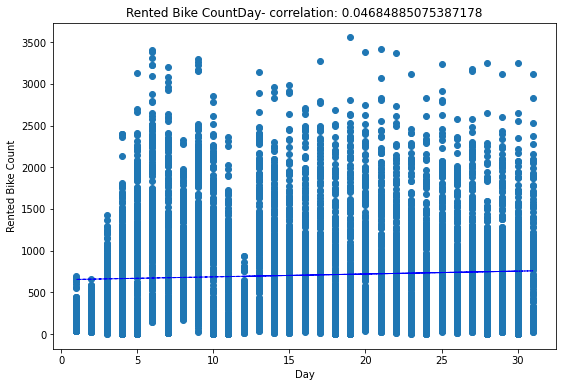

In [ ]:
for col in numeric_features[1:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col],df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "b--", lw=1)


# **Removing outliers from  dataset.**

In [ ]:
df = df[df['Wind speed (m/s)']<=4.5]
df=df[df['Solar Radiation (MJ/m2)']<=3]
df=df[df['Rainfall(mm)']<=10]
df=df[df['Snowfall (cm)']<=4]

#   Drawing scatter plot between dependent and the independent variable again


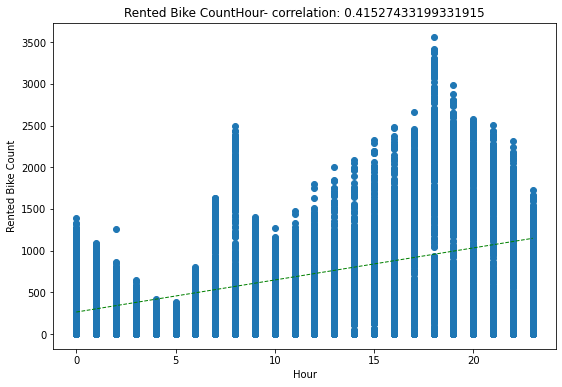

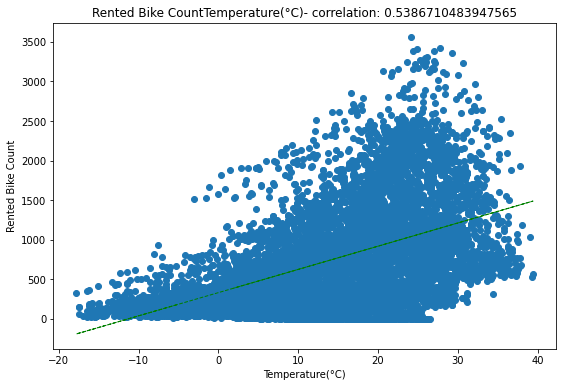

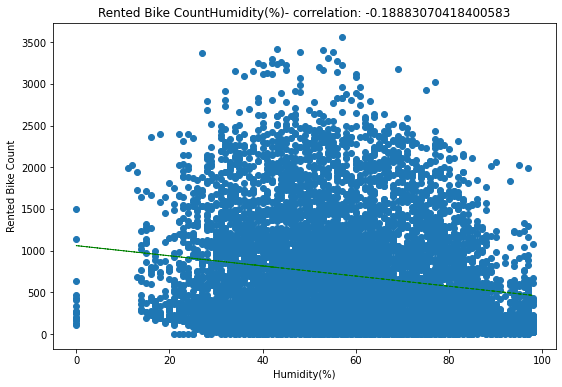

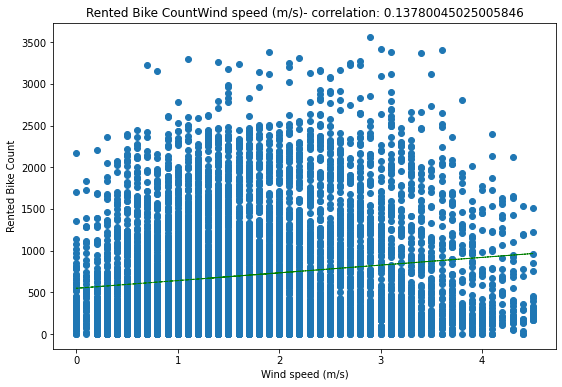

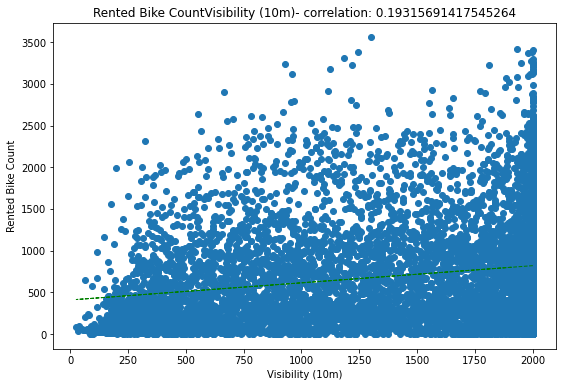

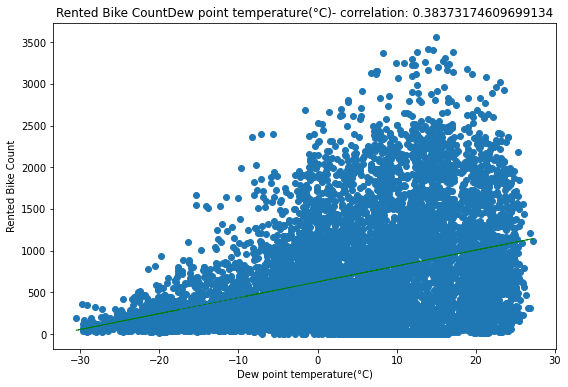

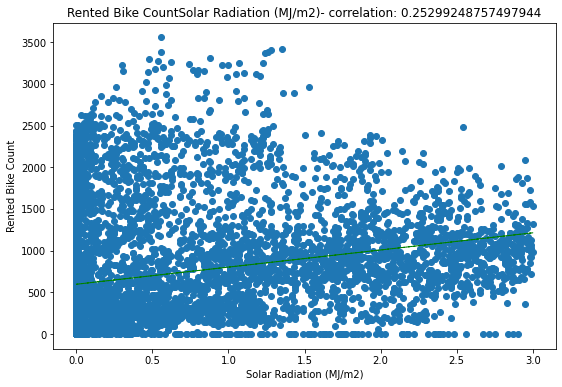

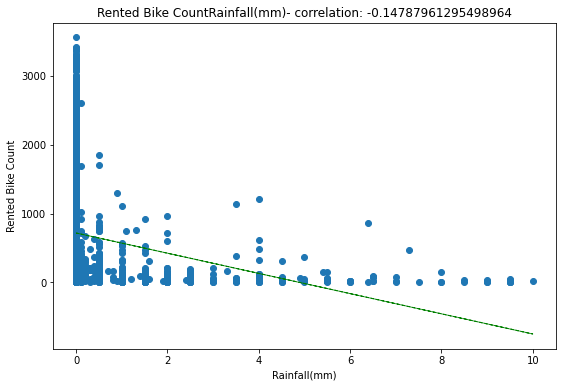

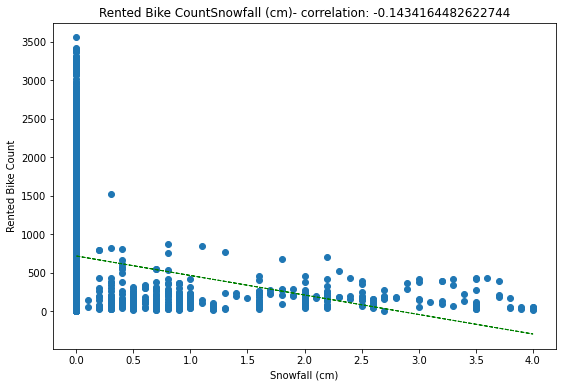

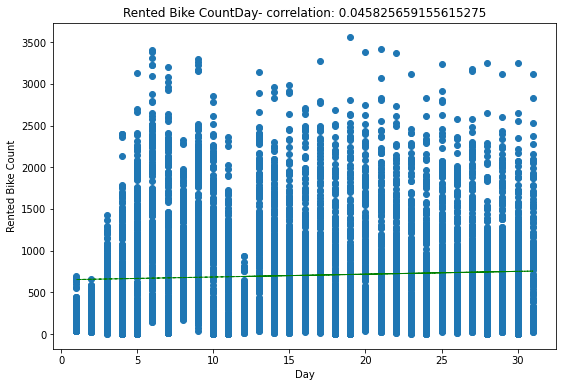

In [ ]:
for col in numeric_features[1:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col],df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "g--", lw=1)

plt.show()

# **Removing Multicollinearity**

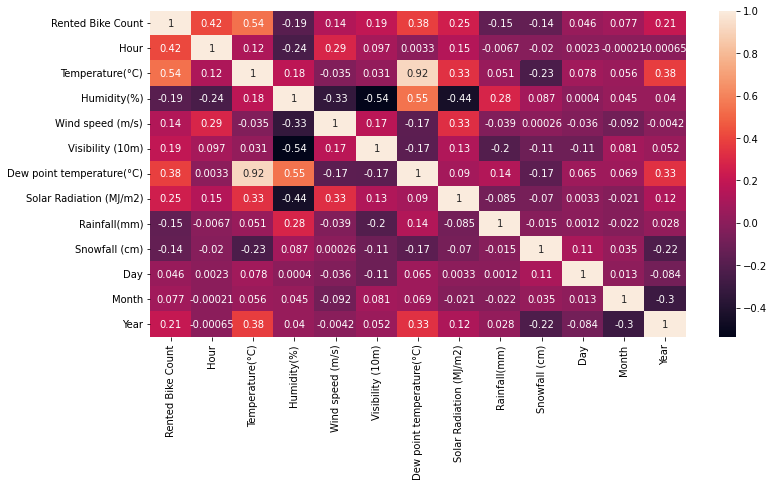

In [ ]:
# Heatmap:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

From above we can see Temperature and Dew Point Temperature are highly correlated so we can remove Dew Point Temperature Column from our dataset

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day', 'Month', 'Year']]])

,variables,VIF
0,Hour,4.322609
1,Temperature(°C),33.174194
2,Humidity(%),5.533490
3,Wind speed (m/s),5.054000
4,Visibility (10m),9.052174
5,Dew point temperature(°C),17.353662
6,Solar Radiation (MJ/m2),2.704729
7,Rainfall(mm),1.119201
8,Snowfall (cm),1.127175


Here Temperature's and Dew Point Temperature's VIF are the highest so we will focus on these two to remove Collinearity. We will be focusing on Dew Point Temperature

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day', 'Month', 'Year','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.850206
1,Temperature(°C),3.153362
2,Humidity(%),5.031031
3,Wind speed (m/s),4.826641
4,Visibility (10m),4.734917
5,Solar Radiation (MJ/m2),2.144313
6,Rainfall(mm),1.116482
7,Snowfall (cm),1.127023


In [ ]:
#Dropping Dew Point Temperature as it was collinear observed from correlation plot and calculated from VIF
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

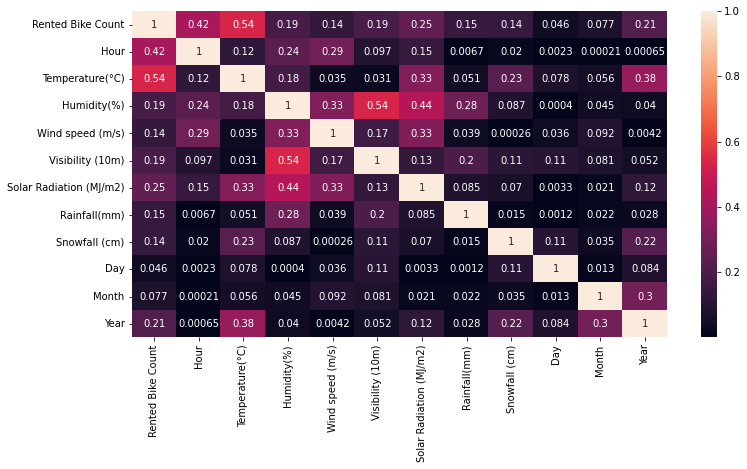

In [ ]:
# Heatmap:
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(df.corr()),annot=True)

# **Relationship between dependent and categorical variable**

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

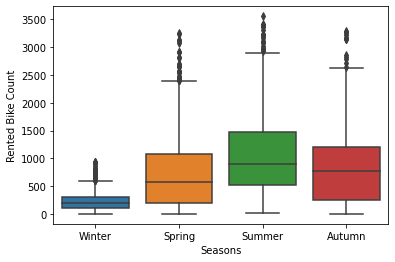

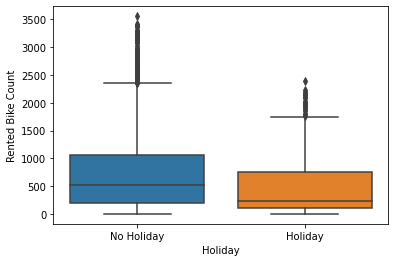

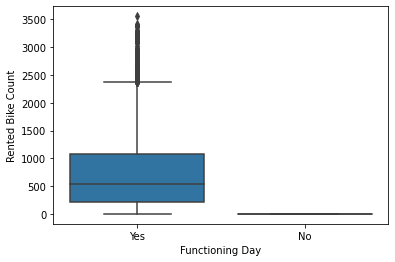

In [ ]:
for col in categorical_features:
  sns.boxplot(x=df[col],y=df['Rented Bike Count'])
  plt.show()

# **Label Encoding**

In [ ]:
#Mapping the Variables
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
#Converting column Seasons into dummy variables
seasons=pd.get_dummies(df['Seasons'],drop_first=True)

In [ ]:
df=pd.concat([df,seasons],axis='columns')

In [ ]:
df.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
1,204,1,-5.5,38,0.8,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
2,173,2,-6.0,39,1.0,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
3,107,3,-6.2,40,0.9,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
4,78,4,-6.0,36,2.3,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
5,100,5,-6.4,37,1.5,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
6,181,6,-6.6,35,1.3,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
7,460,7,-7.4,38,0.9,2000,0.00,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
8,930,8,-7.6,37,1.1,2000,0.01,0.0,0.0,Winter,0,1,12,1,2017,0,0,1
9,490,9,-6.5,27,0.5,1928,0.23,0.0,0.0,Winter,0,1,12,1,2017,0,0,1


In [ ]:
#Creating a copy of our dataframe
data=df.copy()

# **Feature Engineering**

In [ ]:
data['IsVisible']=data['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
data['IsRainfall']=data['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
data['IsSnowfall']=data['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
data['IsSolar_Radiation']=data['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)
#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
data.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)'],axis=1,inplace=True)

In [ ]:
data.drop(['Seasons','Day','Year'],axis=1,inplace=True)

In [ ]:
data.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Holiday,Functioning Day,Month,Spring,Summer,Winter,IsVisible,IsRainfall,IsSnowfall,IsSolar_Radiation
0,254,0,-5.2,37,2.2,0,1,1,0,0,1,1,0,0,0
1,204,1,-5.5,38,0.8,0,1,1,0,0,1,1,0,0,0
2,173,2,-6.0,39,1.0,0,1,1,0,0,1,1,0,0,0
3,107,3,-6.2,40,0.9,0,1,1,0,0,1,1,0,0,0
4,78,4,-6.0,36,2.3,0,1,1,0,0,1,1,0,0,0
5,100,5,-6.4,37,1.5,0,1,1,0,0,1,1,0,0,0
6,181,6,-6.6,35,1.3,0,1,1,0,0,1,1,0,0,0
7,460,7,-7.4,38,0.9,0,1,1,0,0,1,1,0,0,0
8,930,8,-7.6,37,1.1,0,1,1,0,0,1,1,0,0,0
9,490,9,-6.5,27,0.5,0,1,1,0,0,1,0,0,0,0


# **Feature Selection**

In [ ]:
X=data.iloc[:,1:].values
y=data.iloc[:,0:1].values

In [ ]:
X

array([[ 0. , -5.2, 37. , ...,  0. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  0. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  0. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  0. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  0. ]])

In [ ]:
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])

# **Implementing Linear Regression**

In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6767, 14)
(1692, 14)
(6767, 1)
(1692, 1)


In [ ]:
#Fitting Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Predicting on training dataset
y_pred_train = reg.predict(X_train)

In [ ]:
#Predicting on testing dataset
y_pred = reg.predict(X_test)

# **Regression Evaluation Metrics for Linear Regression**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculating MSE, MAE and RMSE
MSE  = mean_squared_error(y_test,y_pred)
print("mse :" , MSE)

MAE=mean_absolute_error(y_test,y_pred)
print("mae :" ,MAE)

RMSE = np.sqrt(MSE)
print("rmse :" ,RMSE)

mse : 178763.82619840396
mae : 319.9580609211146
rmse : 422.8047140210288


In [ ]:
#R square
r2_lin_train = r2_score(y_train,y_pred_train)*100
r2_lin_train

56.32794029692617

In [ ]:
#R square & Adjusted R square
r2 = r2_score(y_test,y_pred)*100
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

R2 : 57.35836447242717
Adjusted R2 :  0.5700238182640092


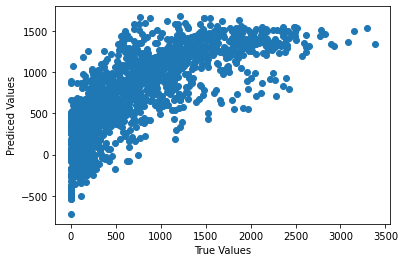

In [ ]:
#Analysing Predicted & True Values
plt.scatter(y_test,y_pred)
plt.xlabel('True Values'), plt.ylabel('Prediced Values')
plt.show()

In [ ]:
#Residual 
e_linear = y_test - y_pred 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


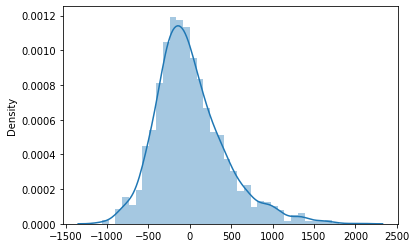

In [ ]:
#Residual Analysis
sns.distplot(e_linear)
plt.show()

According to Linear Regression Assumption,The following cases are not satisfied

There is no Linearity between Predictors vs Target.

The Most of the features are not normally distributed.
There is some Noise in data.

Mean of residuals is not close to zero.

# **Implementation of  Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
#Transforming into Polynomial
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
#Fitting the training dataset
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
#Predicting on train & test dataset
y_pred_poly_train = lin_reg.predict(X_poly)
y_pred_poly_test=lin_reg.predict(X_poly_test)

# **Regression Evaluation Metrics for Polynomial Regression**

In [ ]:
#Calculating Mean squared error, Mean absolute error and Root mean square error
MSE_poly = mean_squared_error(y_test,y_pred_poly_test)
print("mse :" , MSE_poly)

MAE_poly =mean_absolute_error(y_test,y_pred_poly_test)
print("mae :" ,MAE_poly)

RMSE_poly = np.sqrt(MSE_poly)
print("rmse :" ,RMSE_poly)

mse : 119953.36242340718
mae : 245.27160756997972
rmse : 346.3428394285165


In [ ]:
#r square
r2_poly_train = r2_score(y_train,y_pred_poly_train)*100
r2_poly_train

70.89626478549849

In [ ]:
#r square
r2_poly_test= r2_score(y_test,y_pred_poly_test)*100
r2_poly_test

71.38678630044087

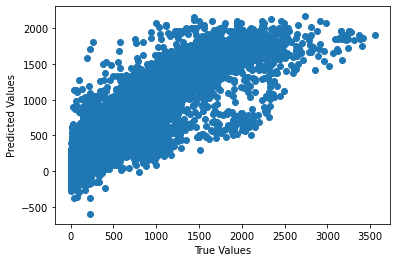

In [ ]:
#Visualisasion of  predicted and true values
plt.scatter(y_train,y_pred_poly_train)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

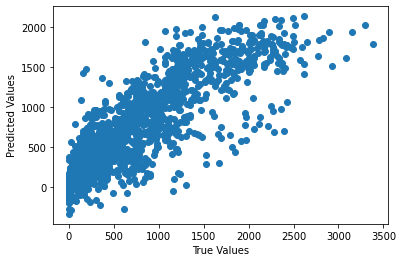

In [ ]:
#Visualisasion of  True &  Predicted Values
plt.scatter(y_test,y_pred_poly_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Error
e_poly = y_test - y_pred_poly_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


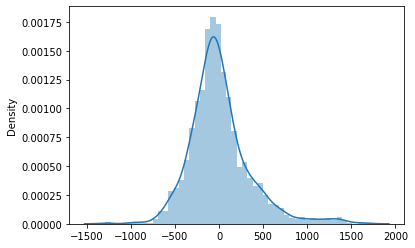

In [ ]:
#Error Analysis
sns.distplot(e_poly)
plt.show()

# **We have used Linear Regression and Polynomial Regression still we are not satisfied with both so we will try another model. So, we are using Random Forest Regressor.**

# **Implementation of  Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
#Fitting Random Forest Regressor
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [ ]:
#Prediction  on train dataset
y_reg_pred = rfc.predict(X_train)
#Prediction  on test dataset
y_reg_pred_test = rfc.predict(X_test)

# **Regression Evaluation Metrics for Random Forest Regressor**

In [ ]:
#Calculation of  MSE, MAE and RMSE
MSE_rfc  = mean_squared_error(y_test,y_reg_pred_test)
print("mse :" , MSE_rfc)

MAE_rfc=mean_absolute_error(y_test,y_reg_pred_test)
print("mae :" ,MAE_rfc)

RMSE_rfc = np.sqrt(MSE_rfc)
print("rmse :" ,RMSE_rfc)

mse : 58333.91172818041
mae : 146.69697842789597
rmse : 241.52414315794687


In [ ]:
# calculation of r square
r2_rfc_train=r2_score(y_train,y_reg_pred)*100
r2_rfc_train

98.16992377791844

In [ ]:
#r square
r2_rfc_test=r2_score(y_test,y_reg_pred_test)*100
r2_rfc_test

86.08525306428643

In [ ]:
print("adjusted R2 : ",1-(1-r2_score(y_test,y_reg_pred_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

adjusted R2 :  0.8596908940471577


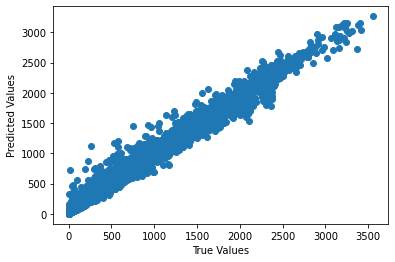

In [ ]:
#Analysis of  True values and Predicted Values
plt.scatter(y_train,y_reg_pred)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

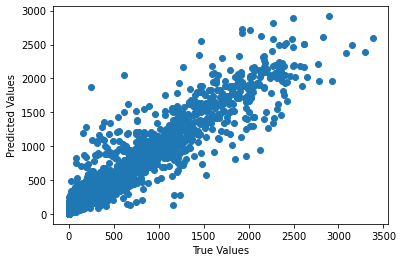

In [ ]:
#Analysing True values and Predicted Values
plt.scatter(y_test,y_reg_pred_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


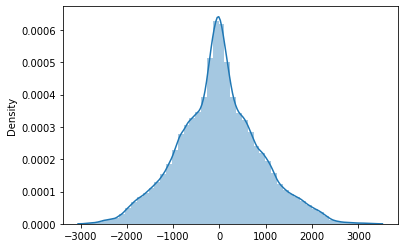

In [ ]:
e = y_test - y_reg_pred_test # Error
 
#Error Analysis
sns.distplot(e)
plt.show()

As Random Forest is prone to overfitting we are facing overfitting here so we have to use hyperparameter tuning to fine tune it to reduce overfitting.


# Hyperparameter tuning using Grid Search CV on Random Forest Regressor

In [ ]:
#Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
#Assigning the parameters
parameters = {'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto', 'sqrt', 'log2']}

In [ ]:
#Performing the grid search using the parameters with cv of 5
grid = GridSearchCV(rfc,parameters,cv=5,scoring='neg_mean_squared_error')
#Fitting  on  training dataset
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
#Checking best parameters after using Grid Search CV
grid.best_params_ 

# **Now we will use these best parameters and we will apply it on our model.**

In [ ]:
rfc_2 = RandomForestRegressor(n_estimators = 100, random_state = 0,criterion= 'absolute_error', max_features= 'auto',max_depth=12)
#Fitting Random Forest Regressor after getting  best parameters
rfc_2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(criterion='absolute_error', max_depth=12, random_state=0)

In [ ]:
#Prediction on  train dataset
y_rfc = rfc_2.predict(X_train)

In [ ]:
#Prediction  on  test dataset
y_rfc_test = rfc_2.predict(X_test)

# **Regression Evaluation Metrics on Random Forest Regressor after using Grid Search CV.**

In [ ]:
#Calculation of  MSE, MAE and RMSE
MSE_rfc_grid  = mean_squared_error(y_test,y_rfc_test)
print("mse :" , MSE_rfc_grid)

MAE_rfc_grid=mean_absolute_error(y_test,y_rfc_test)
print("mae :" ,MAE_rfc_grid)

RMSE_rfc_grid = np.sqrt(MSE_rfc_grid)
print("rmse :" ,RMSE_rfc_grid)

mse : 58979.18848921395
mae : 146.62833333333333
rmse : 242.85631243435685


In [ ]:
#r2 score
r2_rfc_grid_train = r2_score(y_train,y_rfc)*100
r2_rfc_grid_train


92.22448258558946

In [ ]:
#r2 score
r2_rfc_grid_test = r2_score(y_test,y_rfc_test)*100
r2_rfc_grid_test

85.9313312276176

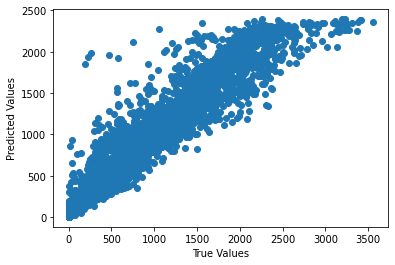

In [ ]:
#Analysis of  True values and Predicted Values
plt.scatter(y_train,y_rfc)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

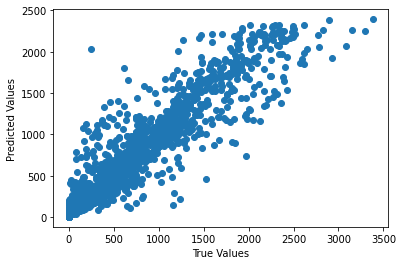

In [ ]:
#Analysis of  True values and Predicted Values
plt.scatter(y_test,y_rfc_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:
 # Error
 e = y_test - y_rfc_test 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


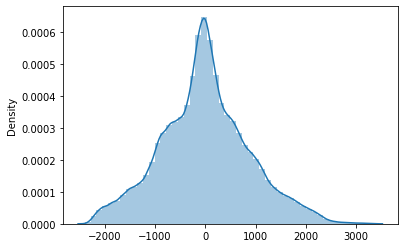

In [ ]:
sns.distplot(e)
plt.show()

# **Comparison of  evaluation metrics of the models  used.**

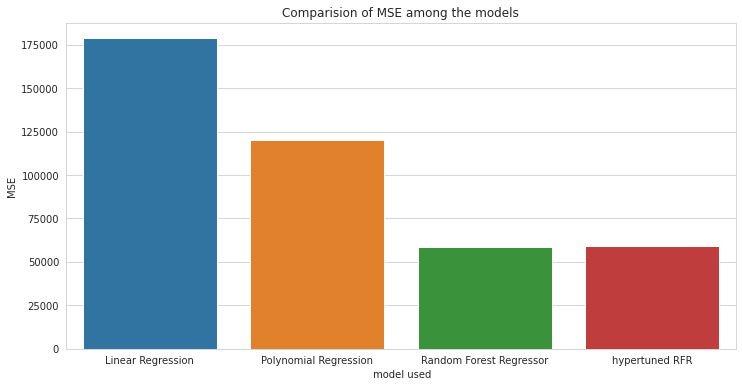

In [ ]:
models = ['Linear Regression','Polynomial Regression','Random Forest Regressor','hypertuned RFR']
acc = [MSE,MSE_poly,MSE_rfc,MSE_rfc_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel("MSE")
plt.xlabel(" model used")
sns.barplot(x= models, y= acc)
plt.title('Comparision of MSE among the models')
plt.show()

# **Comparison of  Mean Absolute Error of all the models  used.**

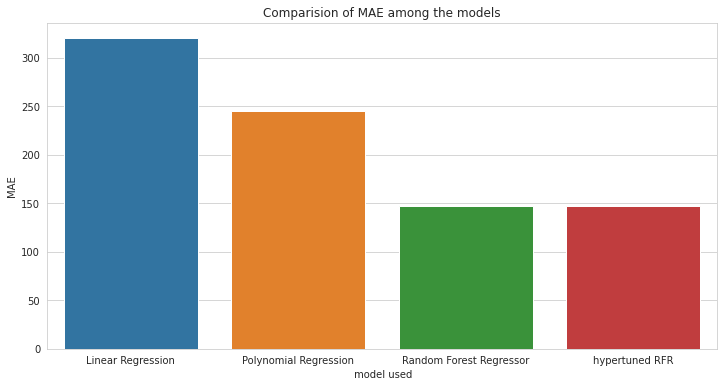

In [ ]:
models = ['Linear Regression','Polynomial Regression','Random Forest Regressor','hypertuned RFR']
acc = [MAE,MAE_poly,MAE_rfc,MAE_rfc_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel("MAE")
plt.xlabel(" model used")
sns.barplot(x= models, y= acc)
plt.title('Comparision of MAE among the models')
plt.show()

# **Comparing Root Mean Square Error of all the models being used.**

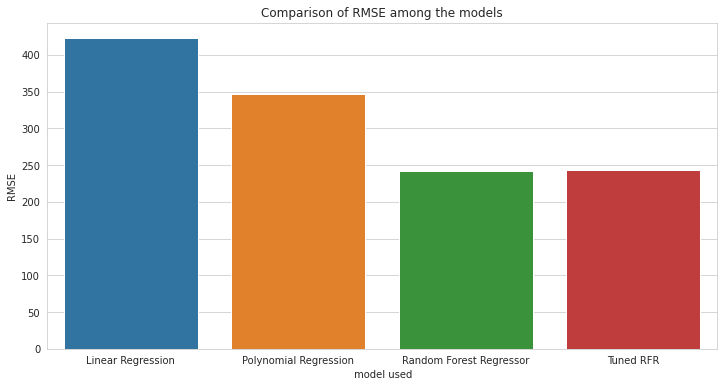

In [ ]:
models = ['Linear Regression','Polynomial Regression','Random Forest Regressor','Tuned RFR']
acc = [RMSE,RMSE_poly,RMSE_rfc,RMSE_rfc_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel("RMSE")
plt.xlabel(" model used")
sns.barplot(x= models, y= acc)
plt.title('Comparison of RMSE among the models')
plt.show()

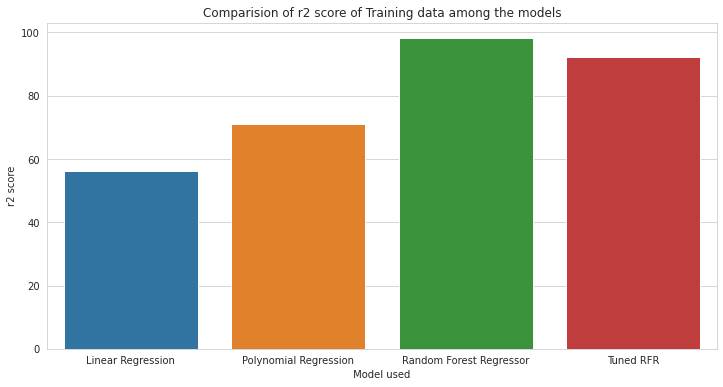

In [ ]:
models = ['Linear Regression','Polynomial Regression','Random Forest Regressor','Tuned RFR']
acc = [r2_lin_train,r2_poly_train,r2_rfc_train,r2_rfc_grid_train]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel("r2 score")
plt.xlabel(" Model used ")
sns.barplot(x= models, y= acc)
plt.title('Comparision of r2 score of Training data among the models')
plt.show()

# **Comparing R square of all the models used for testing dataset.**

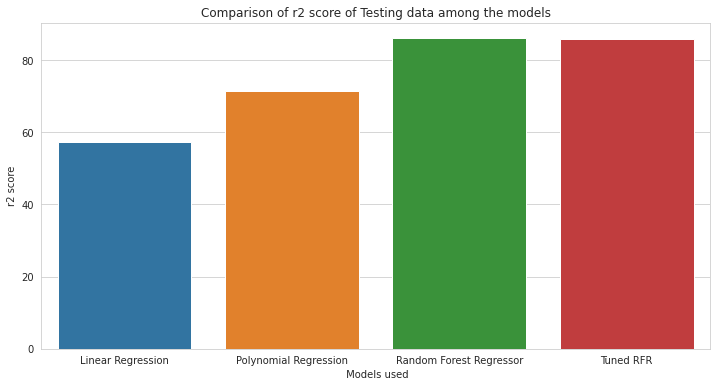

In [ ]:
models = ['Linear Regression','Polynomial Regression','Random Forest Regressor','Tuned RFR']
acc = [r2,r2_poly_test,r2_rfc_test,r2_rfc_grid_test]
plt.figure(figsize=(12,6))

plt.ylabel("r2 score")
plt.xlabel(" Models used")
sns.barplot(x= models, y= acc)
plt.title('Comparison of r2 score of Testing data among the models')
plt.show()

# **Inferences drawn from models implemented above:**

Rented bike count depends on:

Hour of the day in which the bike is rented.

Temperature at the time of renting the bike.

Moisture content of atmosphere at time of bike renting.



Depends on atmospheric condition i.e rain.

We implemented 3 ML algorithm namely linear regression,polynomial regression,random forest regressor and to reduce overfitting we did hyperparameter tuning using grid search cv.

